# AcademIA BB - Ciência de Dados

Bem vindos e bem vindas à AcademIA BB! Esse material faz parte do eixo de Ciência de Dados e contém o conteúdo que será desenvolvido nas Lives.

O conteúdo é baseado em uma premissa "mãos na massa", então os conceitos serão explicados à medida que são apresentados por meio do código.


Projetos de ciências de dados seguem alguns passos, vamos dividir os nossos em 8:

1. Investigar o quadro geral
2. Obter os dados.
3. Descobrir e visualizar os dados para obter insights.
4. Preparar os dados para algoritmos de Aprendizado de Máquina.
5. Selecionar um modelo e treina-lo.
6. Ajustar o modelo.
7. Apresentar a sua solução.
8. Lançar, monitorar e manter seu sistema.


No primeiro passo, é aferida a disponibilidade dos dados que são importantes para o problema. No nosso caso, vamos estudar um problema de rotatividade de clientes do cartão de crédito. Esses dados devem ser obtidos e importados para nosso ambiente de desenvolvimento para que possamos acessá-lo pelo Python.


## Caso de Estudo

Um gerente do banco está incomodado com o fato de cada vez mais clientes abandonarem os serviços de cartão de crédito. Eles realmente apreciariam se alguém pudesse prever quem será desligado, para que possam ir proativamente ao cliente para fornecer-lhes melhores serviços e direcionar as decisões dos clientes na direção oposta.

No nosso exemplo, os clientes estão abandonando os serviços de cartão de crédito e queremos buscar hipóteses que expliquem esse comportamento. Para entender e explorar esse comportamento, vamos analisar os dados dos clientes que abandonaram ou não o serviço. Esses dados podem ou não conter insights sobre a evasão do serviço, mas para aferir essa situação, precisamos primeiro entender quais dados estão disponíveis e como eles poderiam afetar a decisão de evadir ou não.


Os dados dos clientes serão disponibilizados e passaremos para o próximo passo, que é importar os dados para nosso ambiente de desenvolvimento.

### Importando dados

Temos um conjunto de dados que possue várias informações dos clientes. Esses dados nos foram disponibilizados através de um arquivo CSV, ou seja, os dados estão no formato de texto separado por vírgulas.

Esse tipo de arquivo possui dados estruturados em linhas e colunas, o que é muito comum e considerado padrão na ciência de dados. A primeira linha de nosso arquivo de texto possuirá o nome de cada uma de nossas colunas, separados por vírgulas. Todas as outras linhas são consideradas 'observações', ou seja, valores para cada coluna de nosso conjunto. Uma linha possui, portanto, um valor por coluna e o número de valores de cada linha deve corresponder ao número de colunas.

Esse arquivo possui os dados mas nosso ambiente de desenvolvimento Python ainda não tem acesso a eles. Vamos então importar os dados para nosso ambiente.


In [46]:
import pandas as pd # Primeiro vamos importar a biblioteca Pandas para poder manipular o arquivo

df = pd.read_csv('ds_dataset_002.csv',sep=';') # Agora vamos importar os dados e atribuir à variável df

### Observando os valores de nosso DataFrame

Percebemos que mesmo depois de executar a célula acima, os valores de nosso conjunto de dados não aparecem na tela. Isso por que apenas importamos o conjunto de dados para nosso ambiente de desenvolvimento mas ainda não os escrevemos na tela.

Conjuntos de dados costumam ter centenas senão centenas de milhares ou até milhões de linhas. Não se costuma, portanto, visualizar todos os valores de um conjunto de dados e sim apenas algumas linhas.

In [47]:
df.head(5) # Esse comando nos mostra as 5 primeiras linhas do arquivo importado

,Indicador,Idade,Genero,Dependentes,Escolaridade,Estado_Civil,Renda,Cartao,Limite_Credito
0,0,45,M,3,Ensino Médio Completo,Casado,De 60 Mil a 80 Mil,Blue,12691.0
1,0,49,F,5,Pós-Graduação,Solteiro,Menos de 40 Mil,Blue,8256.0
2,0,51,M,3,Pós-Graduação,Casado,De 80 Mil a 120 Mil,Blue,3418.0
3,0,40,F,4,Ensino Médio Completo,NaN,Menos de 40 Mil,Blue,3313.0
4,0,40,M,3,Sem Escolaridade,Casado,De 60 Mil a 80 Mil,Blue,4716.0


## Descrevendo um conjunto de dados



Conjuntos de dados possuem diversas informações que podem descrevê-los. A análise realizada para descrever o conjunto de dados é chamada 'Análise Descritiva'. Essa análise busca descrever o conjunto a partir do que chamamos de 'medidas resumo' que, como o nome diz, resumem e sintetizam informações sobre o conjunto inteiro. Por exemplo, a partir de uma lista de idades é possível obter o valor médio das idades, que corresponde à soma de todas os valores dividida pelo número total de observações. Algumas informações sobre o conjunto podem ser obtidas facilmente a partir da observação simples do conjunto, como
- Número de observações
- Tipo de dados
    - Quantitativos
    - Qualitativos
- Valores mínimos e máximos
- Ordenação dos valores



Para acessar uma coluna do nosso DataFrame, utiliza-se o colchete `[]` com o nome da coluna desejada. É possível selecionar mais de uma coluna utilizando dois colchetes `[[]]`, como no exemplo abaixo.

In [48]:
df['Indicador']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Indicador, Length: 10127, dtype: int64

In [49]:
df[['Indicador','Genero']]

,Indicador,Genero
0,0,M
1,0,F
2,0,M
3,0,F
4,0,M
...,...,...
10122,0,M
10123,1,M
10124,1,F
10125,1,M


In [50]:
df['Idade'][0:10] # para selecionar linhas, utilize um segundo par de colchetes

0    45
1    49
2    51
3    40
4    40
5    44
6    51
7    32
8    37
9    48
Name: Idade, dtype: int64

In [51]:
df[['Indicador','Genero']][0:10] # também funciona para mais de uma coluna

,Indicador,Genero
0,0,M
1,0,F
2,0,M
3,0,F
4,0,M
5,0,M
6,0,M
7,0,M
8,0,M
9,0,M


### Função `info()`


Muitas informações importantes dos nossos dados podems ser obtidas através da função `info()`. Para executar a função, após o nome da sua variável que contém os dados, escreva `.info()` e execute a célula, como no exemplo a seguir. A saída conterá informações sobre o conjunto de dados como número de linhas, colunas, valores nulos e os tipos de dados de cada coluna.

Essa é uma função muito útil para ter uma visão geral de nosso conjunto de dados e escolher quais passos seguir na sua análise.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicador       10127 non-null  int64  
 1   Idade           10127 non-null  int64  
 2   Genero          10127 non-null  object 
 3   Dependentes     10127 non-null  int64  
 4   Escolaridade    10127 non-null  object 
 5   Estado_Civil    9378 non-null   object 
 6   Renda           9015 non-null   object 
 7   Cartao          10127 non-null  object 
 8   Limite_Credito  10127 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 712.2+ KB


### Função `describe()`

A função `describe()` possui um objetivo semelhante, com a diferença que ele irá retornar informações de estatística descritiva das colunas numéricas de nosso conjunto de dados.

As estatísticas obtidas são:
- count : Contagem

É o número de observações daquela variável. Ou seja, é o número de linhas que possuem valores válidos para aquela coluna. Caso em certas linhas os valores para aquela coluna sejam nulos, por exemplo, esses valores não serão contados.

- Média

É a média aritmética dos valores válidos da coluna. A média aritmética é obtida a partir da soma de todos os valores observados dividida pelo número de observações.


- std - Desvio-Padrão

O desvio-padrão é uma medida de distribuição que mede quanto cada observação se distancia da média. Ele nos dá informações sobre a distribuição de valores das nossas observações. Quanto maior o valor do desvio-padrão, maior a variação dos valores observados com relação a média.

- min e max - Mínimo e Máximo

Esses são os valores mínimo e máximo para a coluna observada.

- Mediana

A mediana é uma medida de posição que corresponde ao valor que esteja localizado na metade da lista ordenada dos valores observados. Essa medida é útil pois ela reduz a influência de valores extremos, chamados de __outliers__.

No caso da saída de nossa função `describe()`, a mediana é apresentada a partir de seus 'quartis', que são as posições relativas na lista ordenada de valores de nossas observações.

O primeiro quartil corresponde ao valor apresentado como '25%' e ele apresenta o valor central entre o menor e metade da lista ordenada. Por definição, indica que até seu valor, 25% dos dados estarão incluídos. Isso também indica que apenas 25% dos valores é inferior ao primeiro quartil.

O segundo quartil corresponde à mediana e é o valor que se encontra na posição central da lista ordenada de valores. Indica também que 50% dos valores é inferior ao valor da mediana.

O terceiro quartil é o valor que se encontra na posição 75% da lista ordenada de valores.


In [53]:
df.describe()

,Indicador,Idade,Dependentes,Limite_Credito
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,8631.953698
std,0.367235,8.016814,1.298908,9088.776650
min,0.000000,26.000000,0.000000,1438.300000
25%,0.000000,41.000000,1.000000,2555.000000
50%,0.000000,46.000000,2.000000,4549.000000
75%,0.000000,52.000000,3.000000,11067.500000
max,1.000000,73.000000,5.000000,34516.000000


### Funções de Estatística Descritiva

DataFrames são variáveis muito úteis para a análise descritiva de um conjunto de dados pois possuem funções para a obtenção de valores de forma simples.

Para obter o número total de linhas de nosso conjunto, podemos utilizar a função `len()` ou a variável `shape` de nosso DataFrame.

In [54]:
len(df)

10127

In [55]:
df.shape

(10127, 9)

Para obter o máximo e mínimo de uma coluna ou de todas as colunas, basta utilizar as funções `max()` e `min()`.

In [56]:
df['Idade'].max()

73

### Distribuição de Valores

Os valores observados podem estar distribuídos de forma diferente. Temos uma função chamada `value_counts()` que mostra o número de observações para cada valor na coluna observada. Vamos aplicar essa função na nossa coluna de Indicador, assim vamos saber quantas pessoas evadiram nosso serviço de cartão de crédito.

In [57]:
df['Indicador'].value_counts()

0    8500
1    1627
Name: Indicador, dtype: int64

In [58]:
df['Cartao'].value_counts(normalize=True) #exemplo com o normalize

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Cartao, dtype: float64

# Live 2

* Relembrando a base de dados da Live 1

In [59]:
df

,Indicador,Idade,Genero,Dependentes,Escolaridade,Estado_Civil,Renda,Cartao,Limite_Credito
0,0,45,M,3,Ensino Médio Completo,Casado,De 60 Mil a 80 Mil,Blue,12691.0
1,0,49,F,5,Pós-Graduação,Solteiro,Menos de 40 Mil,Blue,8256.0
2,0,51,M,3,Pós-Graduação,Casado,De 80 Mil a 120 Mil,Blue,3418.0
3,0,40,F,4,Ensino Médio Completo,NaN,Menos de 40 Mil,Blue,3313.0
4,0,40,M,3,Sem Escolaridade,Casado,De 60 Mil a 80 Mil,Blue,4716.0
...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Pós-Graduação,Solteiro,De 40 Mil a 60 Mil,Blue,4003.0
10123,1,41,M,2,Desconhecido,Divorciado,De 40 Mil a 60 Mil,Blue,4277.0
10124,1,44,F,1,Ensino Médio Completo,Casado,Menos de 40 Mil,Blue,5409.0
10125,1,30,M,2,Pós-Graduação,NaN,De 40 Mil a 60 Mil,Blue,5281.0


* Percebemos que 2 colunas possuem valores nulos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicador       10127 non-null  int64  
 1   Idade           10127 non-null  int64  
 2   Genero          10127 non-null  object 
 3   Dependentes     10127 non-null  int64  
 4   Escolaridade    10127 non-null  object 
 5   Estado_Civil    9378 non-null   object 
 6   Renda           9015 non-null   object 
 7   Cartao          10127 non-null  object 
 8   Limite_Credito  10127 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 712.2+ KB


## Tratamento de Nulos

In [61]:
# Live 2
percent_nulos = round(df.isnull().sum() / len(df),3) * 100
df2 = pd.DataFrame(percent_nulos).reset_index()
df2.columns = ['Atributo','Percentual']
df2.sort_values(by = 'Percentual', ascending = False)

,Atributo,Percentual
6,Renda,11.0
5,Estado_Civil,7.4
0,Indicador,0.0
1,Idade,0.0
2,Genero,0.0
3,Dependentes,0.0
4,Escolaridade,0.0
7,Cartao,0.0
8,Limite_Credito,0.0


### Formas do tratamento de nulos:
- dropar os registros cujo valor é nulo
- preencher com aquele de maior frequência/ mediana/ média
- preencher baseado em outra coluna
- Métodos de imputação: https://scikit-learn.org/stable/api/sklearn.impute.html
- preencher como 'Desconhecido' (variáveis categóricas)
- ...

* Vamos retirar da nossa base os registros cuja renda não é conhecida (null)

In [62]:
#isna identifica os valores ausentes, logo, true indica valor ausente e false indica valor não ausente
#nesse exemplo vamos filtrar os valores não ausentes, ou seja, onde isna = false para o atributo renda
df3= df[df['Renda'].isna() == False]

In [63]:
df['Renda'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Name: Renda, Length: 10127, dtype: bool

In [64]:
percent_nulos = round(df3.isnull().sum() / len(df3),3) * 100
df2 = pd.DataFrame(percent_nulos).reset_index()
df2.columns = ['Atributo','Percentual']
df2.sort_values(by = 'Percentual', ascending = False)

,Atributo,Percentual
5,Estado_Civil,7.4
0,Indicador,0.0
1,Idade,0.0
2,Genero,0.0
3,Dependentes,0.0
4,Escolaridade,0.0
6,Renda,0.0
7,Cartao,0.0
8,Limite_Credito,0.0


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicador       9015 non-null   int64  
 1   Idade           9015 non-null   int64  
 2   Genero          9015 non-null   object 
 3   Dependentes     9015 non-null   int64  
 4   Escolaridade    9015 non-null   object 
 5   Estado_Civil    8348 non-null   object 
 6   Renda           9015 non-null   object 
 7   Cartao          9015 non-null   object 
 8   Limite_Credito  9015 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 704.3+ KB


In [66]:
#dropna remove os valores ausentes
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8348 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicador       8348 non-null   int64  
 1   Idade           8348 non-null   int64  
 2   Genero          8348 non-null   object 
 3   Dependentes     8348 non-null   int64  
 4   Escolaridade    8348 non-null   object 
 5   Estado_Civil    8348 non-null   object 
 6   Renda           8348 non-null   object 
 7   Cartao          8348 non-null   object 
 8   Limite_Credito  8348 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 652.2+ KB


## Visualizando os dados

### Variáveis Numéricas

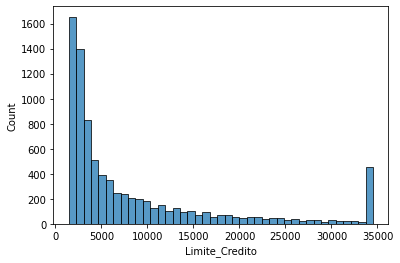

In [67]:
#importar seaborn e matplotlib -  Seaborn e Matplotlib são amplamente utilizadas para visualização de dados em Python

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df3, x = 'Limite_Credito')
plt.show()


* Modificando o tamanho do gráfico

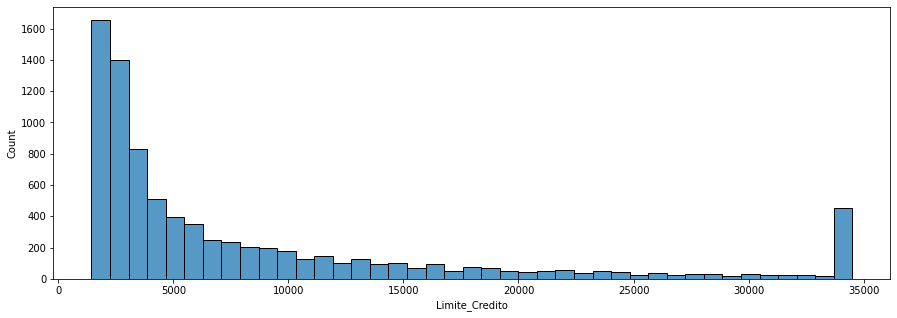

In [68]:
plt.figure(figsize=(15,5))

sns.histplot(df3, x = 'Limite_Credito')
plt.show()

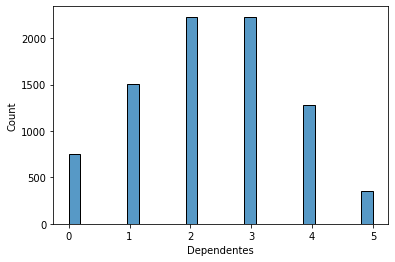

In [69]:

sns.histplot(df3['Dependentes'])
plt.show()


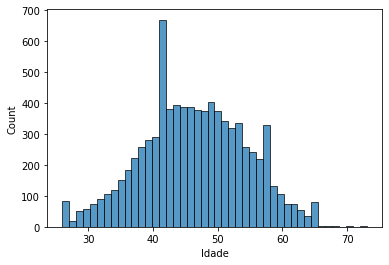

In [70]:
plt.figure(figsize=(15,5))
sns.histplot(df3['Idade'])
plt.show()

# O histplot do Seaborn é uma função utilizada para criar histogramas, que são gráficos de barras que mostram a distribuição de um conjunto de dados.
#Ele é muito útil para visualizar a frequência de valores em diferentes intervalos (bins) e entender a distribuição de uma variável contínua

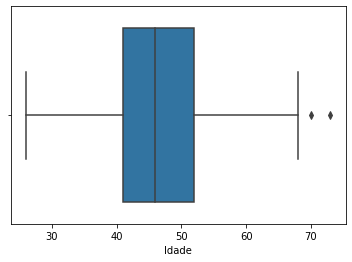

In [71]:
#gerar boxplot da idade

plt.figure(figsize=(15,5))

sns.boxplot(x=df3['Idade'])
plt.show()

#Um boxplot, também conhecido como gráfico de caixa, é uma ferramenta gráfica usada para visualizar a distribuição de um conjunto de dados.
#Ele mostra a mediana, os quartis (Q1 e Q3), e os valores mínimo e máximo, além de possíveis outliers.
#A “caixa” central representa o intervalo interquartil (IQR), que é a faixa entre o primeiro e o terceiro quartil, enquanto as “linhas” (ou whiskers) se estendem até os valores mínimo e
#máximo dentro de 1.5 vezes o IQR. Outliers são plotados como pontos individuais fora dessas linhas.
#O boxplot é útil para identificar a dispersão, a simetria e a presença de outliers em um conjunto de dados, facilitando comparações entre diferentes grupos ou distribuições.

### Variáveis categóricas

In [72]:
df3.Cartao.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [73]:
df3.Estado_Civil.unique()

array(['Casado', 'Solteiro', 'Divorciado'], dtype=object)

In [74]:
df3.Renda.unique()

array(['De 60 Mil a 80 Mil', 'Menos de 40 Mil', 'De 80 Mil a 120 Mil',
       'De 40 Mil a 60 Mil', 'Mais de 120 Mil'], dtype=object)

In [75]:

df3.Escolaridade.unique()

array(['Ensino Médio Completo', 'Pós-Graduação', 'Sem Escolaridade',
       'Desconhecido', 'Ensino Superior Completo', 'Mestrado',
       'Doutorado'], dtype=object)

In [76]:
possiveis_Education = pd.CategoricalDtype(['Sem Escolaridade', 'Desconhecido','Ensino Médio Completo','Ensino Superior Completo','Pós-Graduação','Mestrado', 'Doutorado'],ordered=True)
possiveis_Marital_Status = pd.CategoricalDtype(df3.Estado_Civil.unique())
possiveis_Renda = pd.CategoricalDtype(['Menos de 40 Mil','De 40 Mil a 60 Mil','De 60 Mil a 80 Mil','De 80 Mil a 120 Mil','Mais de 120 Mil'],ordered=True)
possiveis_cartao = pd.CategoricalDtype(['Blue', 'Silver', 'Gold',  'Platinum'],ordered=True)
possiveis_gender = pd.CategoricalDtype(df3.Genero.unique())

possiveis_Education

CategoricalDtype(categories=['Sem Escolaridade', 'Desconhecido', 'Ensino Médio Completo',
                  'Ensino Superior Completo', 'Pós-Graduação', 'Mestrado',
                  'Doutorado'],
                 ordered=True)

In [77]:
df3.loc[:,'Escolaridade'] = df3.Escolaridade.astype(possiveis_Education)
df3.loc[:,'Estado_Civil'] = df3.Estado_Civil.astype(possiveis_Marital_Status)
df3.loc[:,'Renda'] = df3.Renda.astype(possiveis_Renda)
df3.loc[:,'Cartao'] = df3.Cartao.astype(possiveis_cartao)
df3.loc[:,'Genero'] = df3.Genero.astype(possiveis_gender)

#### Cartao

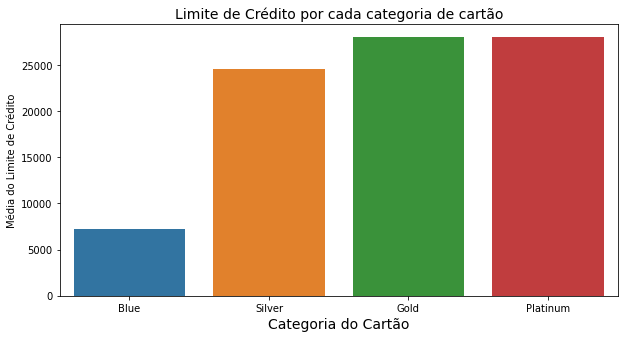

In [82]:
media_limite_cartao = df3.groupby('Cartao')['Limite_Credito'].mean()

plt.figure(figsize=(10,5))

sns.barplot(data = df3,  x=media_limite_cartao.index, y=media_limite_cartao.values)

plt.title('Limite de Crédito por cada categoria de cartão', fontsize=14)
plt.xlabel('Categoria do Cartão', fontsize=14)
plt.ylabel('Média do Limite de Crédito')
plt.show()

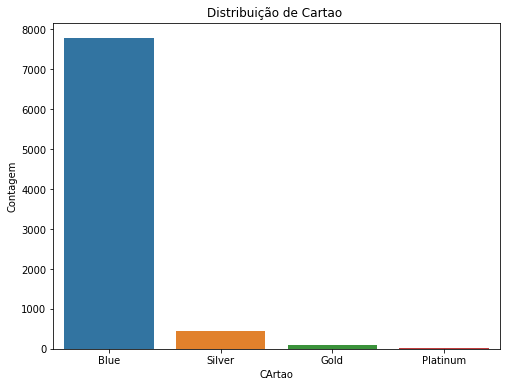

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cartao',data=df3)
plt.title('Distribuição de Cartao ')
plt.xlabel('Cartao')
plt.ylabel('Contagem')
plt.show()

Nesse caso, como o tipo de cartão Blue é muito maior que os outros, pode não fazer sentido para o modelo passar uma variável com muito mais dados. Dessa forma, vamos transformar essa variável em Cartão Blue e Outros.

In [85]:
#nova variável usando numpy

import numpy as np

df3['Cartao_Num'] = np.where(df3['Cartao'] == 'Blue', 1,0)
df3.Cartao_Num.value_counts()

1    7782
0     566
Name: Cartao_Num, dtype: int64

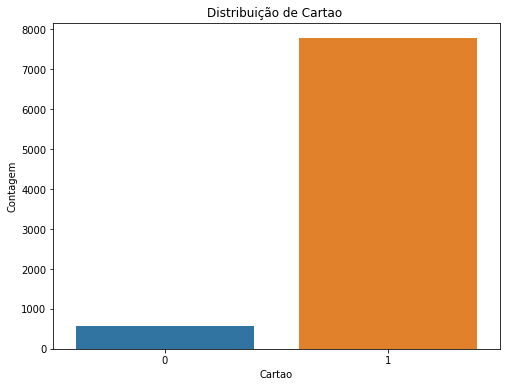

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cartao_Num',data=df3)
plt.title('Distribuição de Cartao ')
plt.xlabel('Cartao')
plt.ylabel('Contagem')
plt.show()

#### Gênero

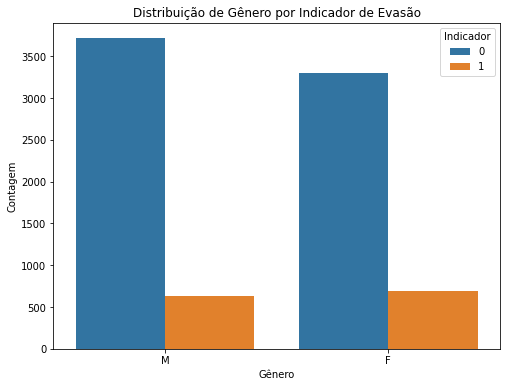

In [79]:
#gerar gráfico genero e indicador

plt.figure(figsize=(8, 6))
sns.countplot(x='Genero', hue='Indicador', data=df3)
plt.title('Distribuição de Gênero por Indicador de Evasão')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

#O countplot do Seaborn é um tipo de gráfico de barras que mostra a contagem de observações em cada categoria de uma variável categórica.
#Ele é útil para visualizar a distribuição de frequências de diferentes categorias em um conjunto de dados.
#Cada barra no gráfico representa uma categoria e sua altura corresponde ao número de ocorrências dessa categoria.
#O countplot é frequentemente usado para análises exploratórias de dados, permitindo identificar rapidamente quais categorias são mais ou menos frequentes.
#Além disso, ele pode ser facilmente customizado com cores, rótulos e outras propriedades para melhorar a clareza e a estética da visualização.

#### Exemplo de gráfico que não agrega

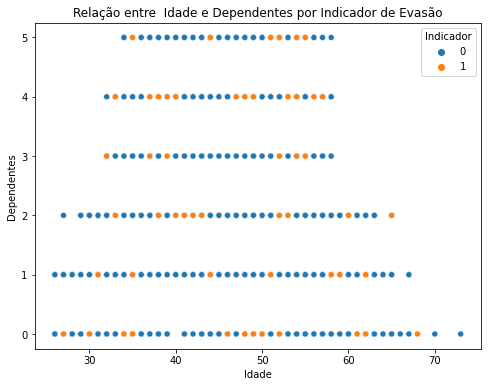

In [80]:
#gerar gráfico idade e dependentes

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Idade', y='Dependentes', hue='Indicador', data=df3)
plt.title('Relação entre  Idade e Dependentes por Indicador de Evasão')
plt.xlabel('Idade')
plt.ylabel('Dependentes')
plt.show()

<AxesSubplot:xlabel='Dependentes', ylabel='Idade'>

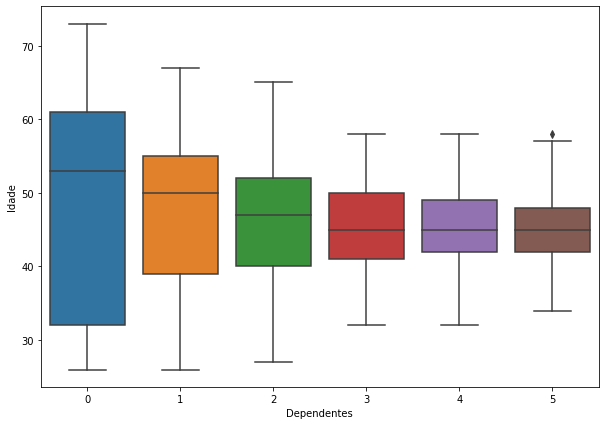

In [81]:
# menos dependentes: maior amplitude de idade, qt maior o num de dependentes, fica mais junto

plt.figure(figsize=(10,7))
sns.boxplot(data = df3, 
            y = 'Idade',  
            x = 'Dependentes',
            #hue = 'Indicador'
           )

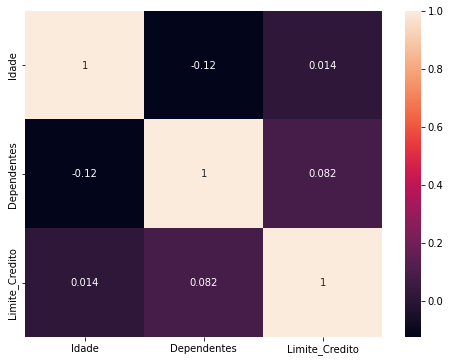

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(df3[['Idade', 'Dependentes', 'Limite_Credito']].corr(), annot=True)
plt.show()

#Um heatmap de correlação no Seaborn é uma visualização gráfica que mostra a matriz de correlação entre várias variáveis de um conjunto de dados.
#Cada célula do heatmap representa o coeficiente de correlação entre duas variáveis, com a intensidade da cor indicando a força e a direção da correlação (positiva ou negativa).
#Esse tipo de gráfico é extremamente útil para identificar rapidamente relações significativas entre variáveis, facilitando a análise exploratória e a seleção de características
#para modelos de machine learning. Além disso, o Seaborn permite adicionar anotações e ajustar a paleta de cores para melhorar a interpretação dos dados.

## Transformações

In [86]:
#nova variável onde genero m = 1 e genero f = 0

df3['Genero_Num'] = df3['Genero'].apply(lambda x: 1 if x == 'M' else 0)
df3.Genero_Num.value_counts()

1    4350
0    3998
Name: Genero_Num, dtype: int64

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8348 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Indicador       8348 non-null   int64   
 1   Idade           8348 non-null   int64   
 2   Genero          8348 non-null   category
 3   Dependentes     8348 non-null   int64   
 4   Escolaridade    8348 non-null   category
 5   Estado_Civil    8348 non-null   category
 6   Renda           8348 non-null   category
 7   Cartao          8348 non-null   category
 8   Limite_Credito  8348 non-null   float64 
 9   Cartao_Num      8348 non-null   int64   
 10  Genero_Num      8348 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 761.3 KB


### Categóricas

A função get_dummies do Pandas é usada para converter variáveis categóricas em variáveis dummy ou indicadores, que são representações numéricas (0 e 1) das categorias. Isso é especialmente útil em análises estatísticas e modelos de machine learning, onde os algoritmos geralmente requerem entradas numéricas.

Por que usar get_dummies?

Preparação de Dados: Transforma dados categóricos em um formato que pode ser facilmente utilizado por algoritmos de machine learning.

Evita Problemas de Ordinalidade: Ao converter categorias em variáveis dummy, evita-se a interpretação errônea de que há uma ordem ou hierarquia entre as categorias.

Facilita a Análise: Permite a inclusão de variáveis categóricas em análises estatísticas e modelos preditivos sem a necessidade de codificação manual.

In [88]:
#criar dummies da escolaridade, estado civil e renda

# Criando dummies para a variável Escolaridade
df_dummies_escolaridade = pd.get_dummies(df3['Escolaridade'], prefix='Escolaridade')

# Criando dummies para a variável Estado_Civil
df_dummies_estado_civil = pd.get_dummies(df3['Estado_Civil'], prefix='Estado_Civil')

# Criando dummies para a variável Estado_Civil
df_dummies_renda = pd.get_dummies(df3['Renda'], prefix='Renda')

# Concatenando as dummies ao DataFrame original
df3 = pd.concat([df3, df_dummies_escolaridade, df_dummies_estado_civil, df_dummies_renda], axis=1)

# Exibindo as primeiras linhas do DataFrame com as dummies
df3.head()

,Indicador,Idade,Genero,Dependentes,Escolaridade,Estado_Civil,Renda,Cartao,Limite_Credito,Cartao_Num,...,Escolaridade_Mestrado,Escolaridade_Doutorado,Estado_Civil_Casado,Estado_Civil_Solteiro,Estado_Civil_Divorciado,Renda_Menos de 40 Mil,Renda_De 40 Mil a 60 Mil,Renda_De 60 Mil a 80 Mil,Renda_De 80 Mil a 120 Mil,Renda_Mais de 120 Mil
0,0,45,M,3,Ensino Médio Completo,Casado,De 60 Mil a 80 Mil,Blue,12691.0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,49,F,5,Pós-Graduação,Solteiro,Menos de 40 Mil,Blue,8256.0,1,...,0,0,0,1,0,1,0,0,0,0
2,0,51,M,3,Pós-Graduação,Casado,De 80 Mil a 120 Mil,Blue,3418.0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,40,M,3,Sem Escolaridade,Casado,De 60 Mil a 80 Mil,Blue,4716.0,1,...,0,0,1,0,0,0,0,1,0,0
5,0,44,M,2,Pós-Graduação,Casado,De 40 Mil a 60 Mil,Blue,4010.0,1,...,0,0,1,0,0,0,1,0,0,0


In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8348 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Indicador                              8348 non-null   int64   
 1   Idade                                  8348 non-null   int64   
 2   Genero                                 8348 non-null   category
 3   Dependentes                            8348 non-null   int64   
 4   Escolaridade                           8348 non-null   category
 5   Estado_Civil                           8348 non-null   category
 6   Renda                                  8348 non-null   category
 7   Cartao                                 8348 non-null   category
 8   Limite_Credito                         8348 non-null   float64 
 9   Cartao_Num                             8348 non-null   int64   
 10  Genero_Num                             8348 non-null   cate

In [93]:
df3.describe()

,Indicador,Idade,Dependentes,Limite_Credito,Cartao_Num,Escolaridade_Sem Escolaridade,Escolaridade_Desconhecido,Escolaridade_Ensino Médio Completo,Escolaridade_Ensino Superior Completo,Escolaridade_Pós-Graduação,Escolaridade_Mestrado,Escolaridade_Doutorado,Estado_Civil_Casado,Estado_Civil_Solteiro,Estado_Civil_Divorciado,Renda_Menos de 40 Mil,Renda_De 40 Mil a 60 Mil,Renda_De 60 Mil a 80 Mil,Renda_De 80 Mil a 120 Mil,Renda_Mais de 120 Mil
count,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000
mean,0.159080,46.378654,2.340201,8455.716507,0.932199,0.144226,0.151773,0.198011,0.101102,0.310374,0.051629,0.042885,0.502396,0.419142,0.078462,0.396622,0.198610,0.155726,0.167585,0.081457
std,0.365773,8.020535,1.297205,9094.793763,0.251419,0.351340,0.358822,0.398525,0.301482,0.462674,0.221290,0.202609,0.500024,0.493448,0.268913,0.489226,0.398978,0.362617,0.373520,0.273551
min,0.000000,26.000000,0.000000,1438.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,2492.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,2.000000,4267.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,3.000000,10683.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,73.000000,5.000000,34516.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Transformação de dados numéricos

Normalizar os dados é uma etapa crucial em ciência de dados por várias razões:

Consistência: Normalizar os dados ajuda a garantir que todas as variáveis estejam na mesma escala, o que é especialmente importante para algoritmos que dependem da distância entre pontos, como K-means e K-Nearest Neighbors.

Velocidade de Convergência: Em algoritmos de aprendizado de máquina, como redes neurais, a normalização pode acelerar a convergência durante o treinamento, tornando o processo mais eficiente.

Melhor Desempenho: Modelos de aprendizado de máquina geralmente têm um desempenho melhor quando os dados são normalizados, pois isso evita que variáveis com escalas maiores dominem o modelo.

Redução de Erros: A normalização pode ajudar a reduzir erros numéricos durante os cálculos, especialmente em algoritmos que envolvem operações matriciais.

* Escalas diferentes influenciam os algoritmos de forma diferente, dando mais peso para 1 que outro.

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#### MinMax scaler

In [94]:
# exemplo do minmax scaler

idade_max = df3.Idade.max()
idade_min = df3.Idade.min()

df3['Idade_SC_'] = (df3['Idade'] - idade_min) / (idade_max - idade_min)

In [95]:
# normalizar idade, dependentes e limite_credito

from sklearn.preprocessing import MinMaxScaler

# Crie um objeto StandardScaler
scaler = MinMaxScaler()

# Selecione as colunas que você deseja escalonar
cols_to_scale = ['Idade', 'Dependentes', 'Limite_Credito']
cols_scaled = ['Idade_SC', 'Dependentes_SC', 'Limite_Credito_SC']

# Aplique o StandardScaler às colunas selecionadas
df3[cols_scaled] = scaler.fit_transform(df3[cols_to_scale])

# Exiba as primeiras linhas do DataFrame com as colunas escalonadas
df3.head()


,Indicador,Idade,Genero,Dependentes,Escolaridade,Estado_Civil,Renda,Cartao,Limite_Credito,Cartao_Num,...,Estado_Civil_Divorciado,Renda_Menos de 40 Mil,Renda_De 40 Mil a 60 Mil,Renda_De 60 Mil a 80 Mil,Renda_De 80 Mil a 120 Mil,Renda_Mais de 120 Mil,Idade_SC_,Idade_SC,Dependentes_SC,Limite_Credito_SC
0,0,45,M,3,Ensino Médio Completo,Casado,De 60 Mil a 80 Mil,Blue,12691.0,1,...,0,0,0,1,0,0,0.404255,0.404255,0.6,0.340190
1,0,49,F,5,Pós-Graduação,Solteiro,Menos de 40 Mil,Blue,8256.0,1,...,0,1,0,0,0,0,0.489362,0.489362,1.0,0.206112
2,0,51,M,3,Pós-Graduação,Casado,De 80 Mil a 120 Mil,Blue,3418.0,1,...,0,0,0,0,1,0,0.531915,0.531915,0.6,0.059850
4,0,40,M,3,Sem Escolaridade,Casado,De 60 Mil a 80 Mil,Blue,4716.0,1,...,0,0,0,1,0,0,0.297872,0.297872,0.6,0.099091
5,0,44,M,2,Pós-Graduação,Casado,De 40 Mil a 60 Mil,Blue,4010.0,1,...,0,0,1,0,0,0,0.382979,0.382979,0.4,0.077747


In [105]:
df3[['Idade', 'Idade_SC', 'Idade_SC_']]

,Idade,Idade_SC,Idade_SC_
0,45,0.404255,0.404255
1,49,0.489362,0.489362
2,51,0.531915,0.531915
4,40,0.297872,0.297872
5,44,0.382979,0.382979
...,...,...,...
10121,56,0.638298,0.638298
10122,50,0.510638,0.510638
10123,41,0.319149,0.319149
10124,44,0.382979,0.382979
